# 2. Practical Part

## 1. Ridge Regression

We implement ridge regression as `regression_gradient`, a function of a `gradDescent` class:

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(5)


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 4000):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        print('targets:', target)
        for i in range(0, self.numberSteps):
            # Stochastic gradient descent - choose one datapoint randomly
            index = np.random.randint(0, data.shape[0])
            
            # Calculate gradients
            if np.size(data[index]) == 1: # If data is 1D, just multiply
                grad =2*(weight * data[index]  + bias - target[index]) * data[index]
                biasGrad = 2*(weight * data[index] + bias - target[index])
            else: # Otherwise, we need the explicit dot product
                grad = 2 * np.dot((np.dot(weight, data[index]) + bias - target[index]), data[index])
                biasGrad = 2*(np.dot(weight, data[index]) + bias - target[index])
                
            # Do regularization
            weightGrad = 2 * self.weightedDecay * weight
            regGrad = weightGrad + grad
                
            # Update parameters  
            bias = bias - self.stepSize*biasGrad
            weight = weight - self.stepSize*regGrad

        print('w:',  weight, 'b:', bias)
        return weight, bias  

## 2. Draw Dn from h(x)

We define our target function $h(x)$, and then draw a dataset $D_{n}$ from it:

In [34]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

##  3. Train without regularization, $\lambda$ = 0
We plot h(x), Dn, and our prediction function $f(X) = w^T X + b $ in the following part.

## 4. Part 3 revisited, with different $\lambda$ values
We extend the original plot to also plot predictions with $W$ regularized by $\lambda$ $\lVert w \rVert^2$, choosing an intermediate and large value for $\lambda$.

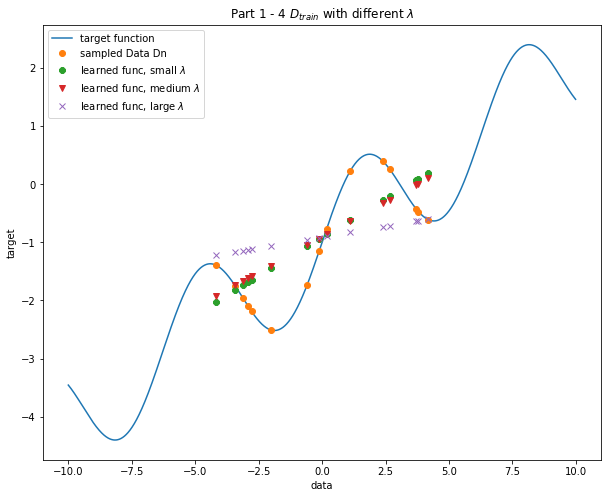

In [35]:
#initialize weights
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Medium lambda
weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Large lambda
weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Use the learned parameters to define a linear function
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]

# Then plot the functions
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$

We sample our test set $D_{test}$ and train models on $D_{n}$ , using $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

Then we plot $\lambda$  on the x-axis, and loss on the y-axis (N.B. to TAs: we plotted $\lambda$ on a log scale):

In [36]:
# Sample D_test
data = np.random.uniform(-5,5,100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

# Do GD for each lambda value and plot
for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDn[0], dataDn[1])
    
    xvals = np.arange(-10, 10, 0.01)
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    # Calculate loss
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    
    # Uncomment to plot
    """plt.rcParams['figure.figsize'] = [10, 8]
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()"""

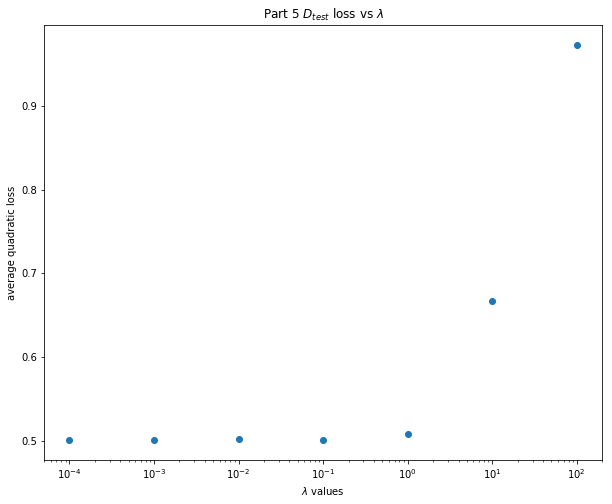

In [37]:
# Plot the error
plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Nonlinear preprocessing

We set $\lambda = 0.01$ and try fitting different degrees of polynomials.


On degree 1.
targets: [-2.18772096 -0.42383565 -2.0871132  -0.60884901 -1.15039532  0.23421314
  0.26173127 -0.76160569 -2.50511821 -1.95564015 -1.38985848  0.4022026
 -1.72986124 -1.7532264  -0.47154861]
w: [0.29666068] b: [-1.08142037]
learned func before sum: [[-1.90615731]
 [ 0.0183966 ]
 [-1.95146931]
 [ 0.16043359]
 [-1.11579982]
 [-0.74992027]
 [-0.29257632]
 [-1.02678144]
 [-1.68423338]
 [-2.00782869]
 [-2.32519616]
 [-0.37406177]
 [-1.25553283]
 [-2.09508063]
 [ 0.0457034 ]]
learned func after sum: [[-1.90615731]
 [ 0.0183966 ]
 [-1.95146931]
 [ 0.16043359]
 [-1.11579982]
 [-0.74992027]
 [-0.29257632]
 [-1.02678144]
 [-1.68423338]
 [-2.00782869]
 [-2.32519616]
 [-0.37406177]
 [-1.25553283]
 [-2.09508063]
 [ 0.0457034 ]]
[[-2.56472376]
 [-2.53475803]
 [-2.50479231]
 [-2.47482658]
 [-2.44486086]
 [-2.41489513]
 [-2.38492941]
 [-2.35496368]
 [-2.32499796]
 [-2.29503223]
 [-2.26506651]
 [-2.23510078]
 [-2.20513506]
 [-2.17516933]
 [-2.14520361]
 [-2.11523788]
 [-2.08527216]
 [-2.0

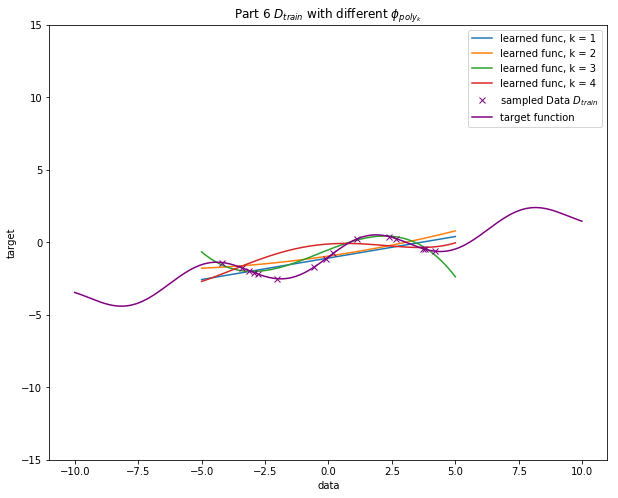

In [54]:
# Define step size and number of steps for each degree
kDegreeArr = [1, 2, 3, 4]
stepsizeArr = [0.01, 0.001, 1.0e-6, 1.0e-7]
#stepsizeArr = [0.01, 0.001, 5.5180124e-08, 0.00000001]
numStepArr = [400, 40000, int(1e6), int(1e6)]
#numStepArr = [400, 40000, 837605, 40000]

#stepsizeArr = [10**(-7), 10**(-7), 10**(-7), 10**(-7)]
#numStepArr = [10, 10, 10, 10]

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylim(top = 5, bottom=-5)

lossArr_train = []
lossArr_test = []
learned_param = []

np.random.seed(5)

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    if k == 1: # Do nothing
        return input_data
    to_map = [input_data]
    for i in range(2, k+1):
        raised = np.power(input_data, i)
        to_map.append(raised)
    dataK = np.column_stack(to_map)[0]
    return dataK
    
for k in kDegreeArr:
    print('On degree {}.'.format(k))
    # Initialize weights and bias randomly according to degree
    weight = np.random.rand(k)
    bias = 0
    
    # Get a mapping of the training data
    dataDM = []
    for data in dataDn[0]:
        dataDM.append(to_map(data, k))
    dataDM = np.array(dataDM)

    # Get a mapping of the dummy data (to make plot smooth)
    dataK = np.array(np.linspace(-5, 5, 100))
    dataKn = [dataK , hX(dataK)]
    dataKM = []
    for data in dataK:
        dataKM.append(to_map(data, k))
    dataKM = np.array(dataKM)
    
    # Get a mapping of the targets
    #targetsM = []
    #for target in dataDn[1]:
    #    targetsM.append(to_map(target, k))
    #targetsM = np.array(targetsM)

    # Do the descent
    regGD = 0
    regGD = gradDescent(weightedDecay = 0.01, 
                        stepSize = stepsizeArr[kDegreeArr.index(k)],
                        numberSteps= numStepArr[kDegreeArr.index(k)])
    regGDParam = regGD.regression_gradient(weight, bias, dataDM, dataDn[1])
    learned_param.append([regGDParam[0], regGDParam[1]])
    
    # Define the function using the learned parameters
    learnedFunc, learnedFunc_plot = [], []
    for i, point in enumerate(dataDM):
        learnedFunc.append(np.dot(regGDParam[0], point) + regGDParam[1])
    learnedFunc = np.array(learnedFunc)
    print('learned func before sum:', learnedFunc)
    #learnedFunc = np.sum(learnedFunc, axis = 1)
    print('learned func after sum:', learnedFunc)
    
    # Define a function with dummy data and learned parameters, for a smooth plot
    #dataK = np.array(np.linspace(-10, 10, 100))
    for point in dataKM:
        learnedFunc_plot.append(np.dot(regGDParam[0], point) + regGDParam[1])
    learnedFunc_plot = np.array(learnedFunc_plot)
    #learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
    print(learnedFunc_plot)
    plt.plot(dataK, learnedFunc_plot, label = "learned func, k = {}".format(k)) 
    #plt.scatter(dataDn[0], learnedFunc, label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
        
# Do the rest of the plot    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'x', label="sampled Data $D_{train}$", color="purple")
plt.plot(xvals, hX(xvals), label = "target function", color="purple")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

## 7. Increasing $l$

We plot the the empirical risk (loss on $D_{n}$ and the true risk (loss on $D_{test}$) with increasing $l$ (N.B. to TA's, the average quadratic loss is on a log scale to be more easily visualized):

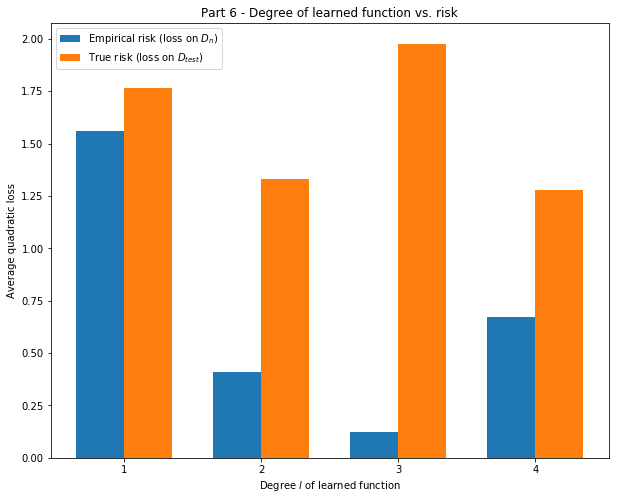

In [56]:
# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:    
    # Get the function
    learnedFunc = []
    for point in dataDtest[0]:
        learnedFunc.append(np.dot(learned_param[k-1][0], point) + learned_param[k-1][1])
    learnedFunc = np.array(learnedFunc)
    if k != 1:
        learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate test error
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

# Plot training and test error
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3', '4'))
#plt.yscale('log')
plt.legend(loc='best')
plt.show()

Generally, as the degree $l$ of the learned function goes up, the empirical risk (loss on $D_{n}$) *should* decrease, while the true risk (loss on $D_{test}$) *should* increase. This is because with increasing degree, the learned function should be able to fit the training data better and better, using its higher capacity to effectively memorize the data. We do not see this exact pattern on our set of learned functions above, for which we offer the following explanation:

* The function of degree 1 has the lowest empirical risk, likely because, due to the vertical symmetry of the sine function, a line will offer a reasonable fit. In other words, one can imagine that the error generated by points above the fit line will be "cancelled out" by the error generated by points below the line.

* The function of degree 2 has a poorer fit and a higher empirical risk than the function of degree 1, likely because one curve will never be sufficient to model the many curves of the sine in our data's window, and the symmetry effect in the degree-1 case is not present.

* The function of degree 3 has a higher empirical risk than the functions of degrees 1 or 2, in this case likely because of the extrema of the function (highly negative and highly positive respectively). On the other hand, visually we can see that one of the curves of the sine is starting to be modelled by the one curve of the cubic function.

* The function of degree 4, by contrast, has a *lower* empirical risk than the function of degree 3. Here we are starting to see the expected effect: a higher number of curves (a higher capacity) is letting us model the sine data more closely. We also remark that the true risk *increases* as the empirical risk decreases here, since perhaps we are starting to overfit to the training data which means poorer generalization to the test data.

From this trend, we therefore predict that if we were to continue plotting functions of higher degree and optimizing their hyperparameters, we would see a continuation of the typical "higher degree $\Rightarrow$ lower empirical risk $\Rightarrow$ higher true risk" pattern.

However, we remark that for a reason we cannot detect, the fit of our functions is likely still not optimal, perhaps due to ill choice of hyperparameters despite our efforts to tune them well. In the cases of degrees 3 and 4, we note that learning a function with a horizontally larger scaling would fit the target function better.